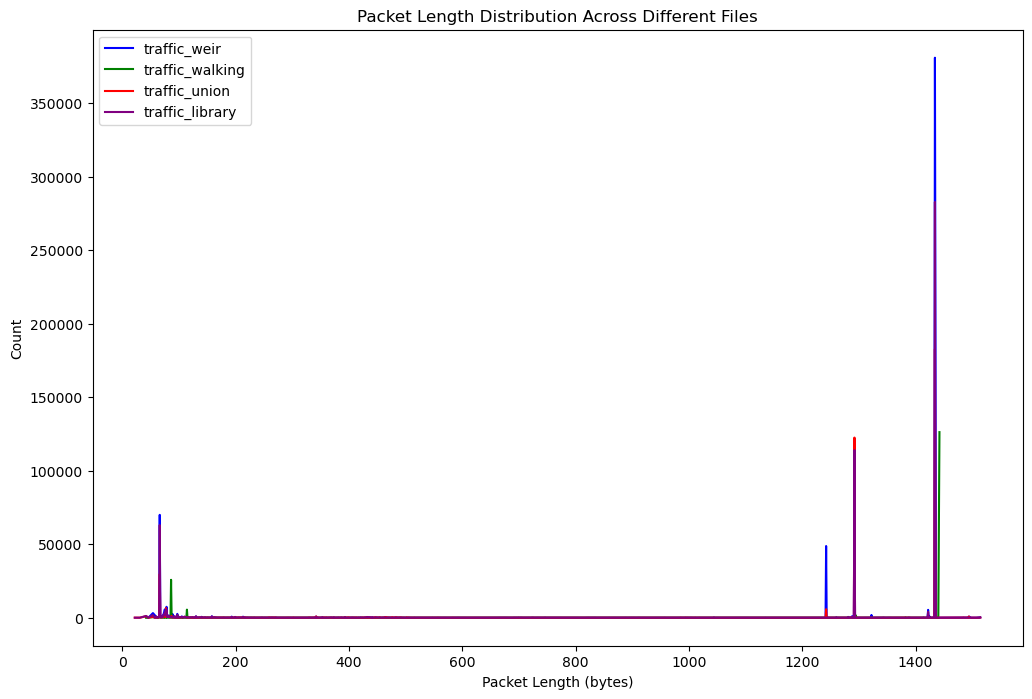

Missing packet lengths for traffic_weir.csv:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 61, 1435, 1437, 1438, 1439, 1440, 1441, 1442, 1445, 1446, 1447, 1448, 1450, 1451, 1453, 1455, 1456, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1470, 1472, 1475, 1476, 1479, 1482, 1490, 1495, 1496, 1497, 1499, 1500, 1501, 1502, 1506, 1508, 1509, 1510, 1511, 1512, 1513]


Missing packet lengths for traffic_walking.csv:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 65, 68, 205, 234, 235, 236, 251, 257, 263, 265, 268, 269, 272, 273, 276, 281, 284, 285, 291, 292, 297, 305, 307, 309, 311, 312, 313, 317, 318, 321, 323, 325, 329, 335, 336, 339,

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_names = ['time/traffic_weir.csv', 'time/traffic_walking.csv', 'time/traffic_union.csv', 'time/traffic_library.csv']
output_files = []
missing_lengths_dict = {}

for file in file_names:
    df = pd.read_csv(file, encoding='latin1')
    
    packet_lengths = df.iloc[:, 5].astype(int)
    frequency_table = packet_lengths.value_counts().reset_index()
    frequency_table.columns = ['Packet Length (bytes)', 'Count']
    
    frequency_table = frequency_table.sort_values(by='Packet Length (bytes)', ascending=True)
    
    output_file = file.replace('.csv', '_sorted_by_length.csv')
    frequency_table.to_csv(output_file, index=False)
    output_files.append(output_file)
    
    max_length = frequency_table['Packet Length (bytes)'].max()
    full_range = set(range(0, max_length + 1))
    
    observed_lengths = set(frequency_table['Packet Length (bytes)'])
    
    missing_lengths = sorted(full_range - observed_lengths)
    missing_lengths_dict[file] = missing_lengths
    
    missing_lengths_df = pd.DataFrame(missing_lengths, columns=['Missing Packet Length (bytes)'])
    missing_file = file.replace('.csv', '_missing_lengths.csv')
    missing_lengths_df.to_csv(missing_file, index=False)

plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']
for idx, file in enumerate(file_names):
    frequency_table = pd.read_csv(file.replace('.csv', '_sorted_by_length.csv'))
    
    plt.plot(frequency_table['Packet Length (bytes)'], frequency_table['Count'], label=file.replace('.csv', ''), color=colors[idx])

plt.title("Packet Length Distribution Across Different Files")
plt.xlabel("Packet Length (bytes)")
plt.ylabel("Count")
plt.legend()
plt.show()

for file, missing_lengths in missing_lengths_dict.items():
    print(f"Missing packet lengths for {file}:")
    print(missing_lengths)
    print("\n")


In [ ]:

common_missing_lengths = set.intersection(*[set(lengths) for lengths in missing_lengths_dict.values()])

print("Common missing packet lengths across all files:")
print(sorted(common_missing_lengths))

common_missing_count = len(common_missing_lengths)
print("Number of common missing packet lengths:", common_missing_count)



Common missing packet lengths across all files:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 55, 56, 61]
Number of common missing packet lengths: 50


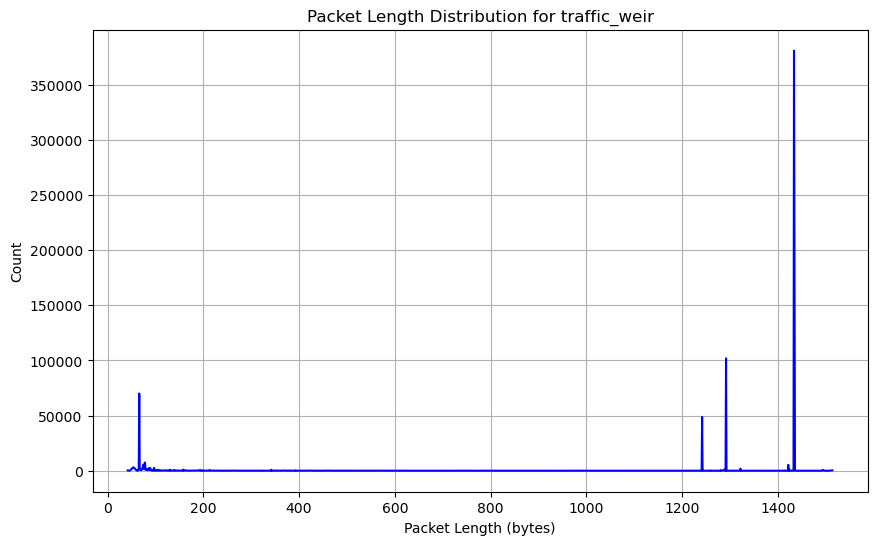

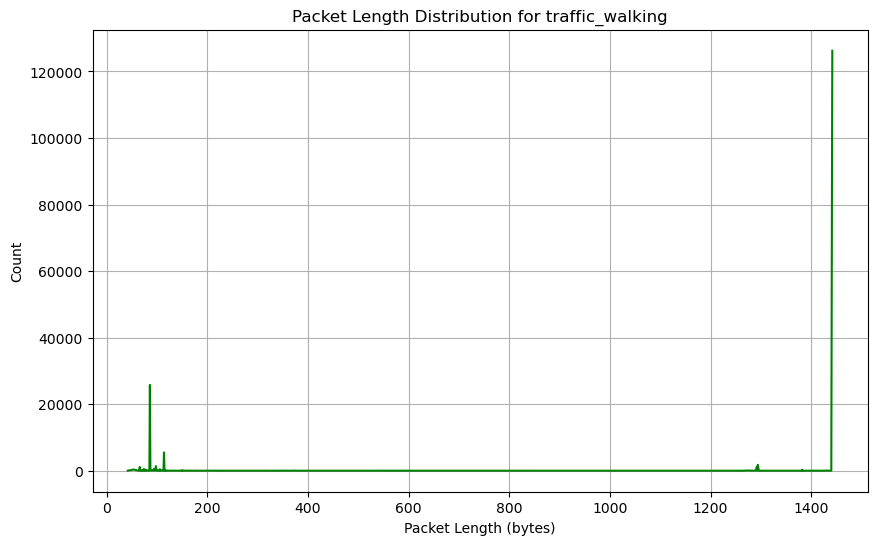

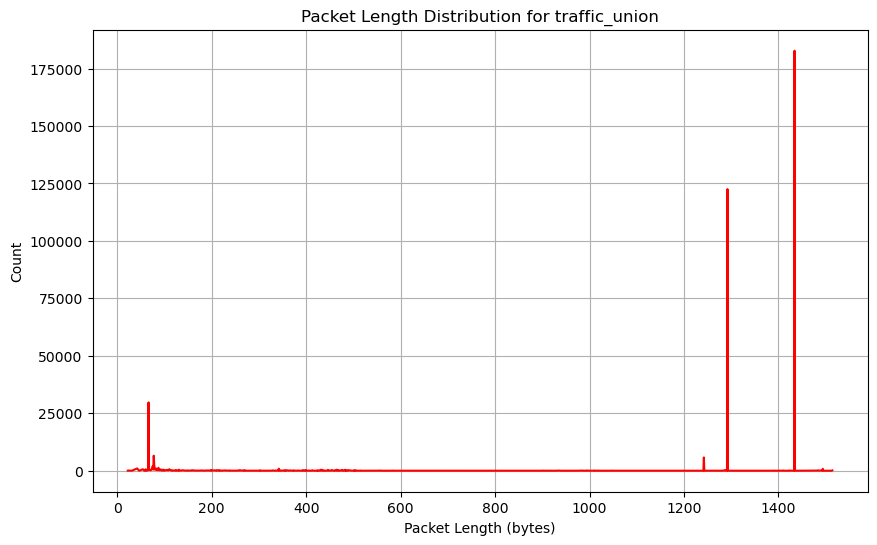

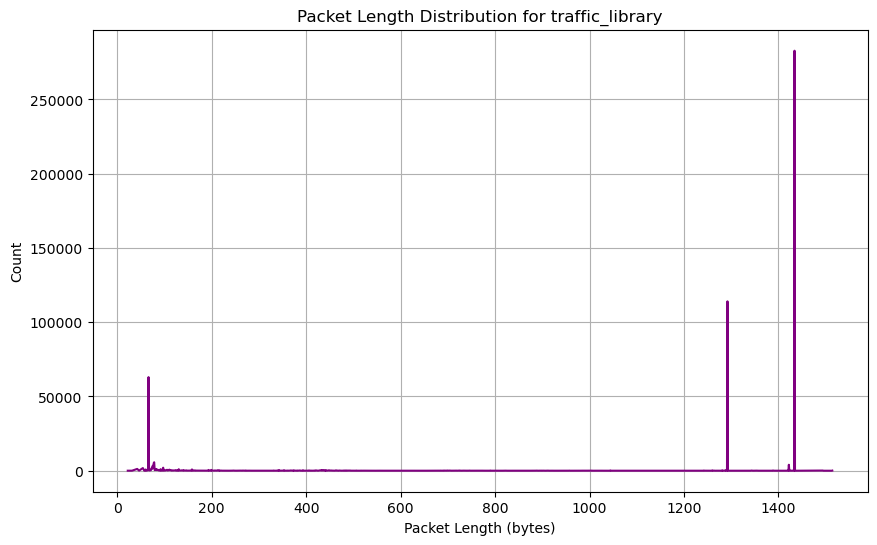

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_names = ['traffic_weir.csv', 'traffic_walking.csv', 'traffic_union.csv', 'traffic_library.csv']

# Colors for each plot
colors = ['blue', 'green', 'red', 'purple']

for idx, file in enumerate(file_names):
    frequency_table = pd.read_csv(file.replace('.csv', '_sorted_by_length.csv'))
    
    plt.figure(figsize=(10, 6))
    plt.plot(frequency_table['Packet Length (bytes)'], frequency_table['Count'], color=colors[idx])
    
    plt.title(f"Packet Length Distribution for {file.replace('.csv', '')}")
    plt.xlabel("Packet Length (bytes)")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()
